Logistic Regression - Regularized

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
%matplotlib inline

In [596]:
df = pd.read_csv('ex2data2.txt', names = ["test1", "test2", "pass"])
df.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [597]:
score_admitted = df.loc[df['pass']==1,['test1','test2']]
score_dropped = df.loc[df['pass']==0,['test1','test2']]


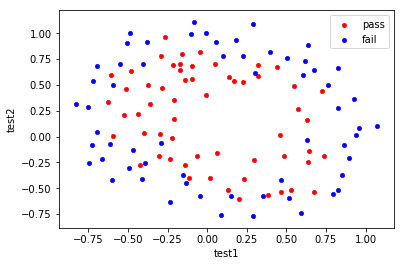

In [598]:
ax = score_admitted.plot(x='test1', y='test2', kind='scatter', marker='o', c='red', lw=0.5, label='pass')
ax.set_xlabel("Test 1")
ax.set_ylabel("Test 2")
score_dropped.plot(x='test1', y='test2', kind='scatter', marker='o', c='blue', lw=0.5, label='fail', ax=ax)


In [599]:
def Sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [600]:
Sigmoid(1)

0.7310585786300049

In [601]:
df.insert(0, column='x0', value=1.0)

In [602]:
df.head()

,x0,test1,test2,pass
0,1.0,0.051267,0.69956,1
1,1.0,-0.092742,0.68494,1
2,1.0,-0.213710,0.69225,1
3,1.0,-0.375000,0.50219,1
4,1.0,-0.513250,0.46564,1


In [603]:
x1 = np.array(df.iloc[:,1])
x2 = np.array(df.iloc[:,2])
df2 = df
df2.head()

,x0,test1,test2,pass
0,1.0,0.051267,0.69956,1
1,1.0,-0.092742,0.68494,1
2,1.0,-0.213710,0.69225,1
3,1.0,-0.375000,0.50219,1
4,1.0,-0.513250,0.46564,1


In [604]:
deg=6
for i in range(0,deg+1):
    for j in range(0,deg-i+1):
        df2['f' + str(i) + str(j)] = np.power(x1,i)*np.power(x2,j)
df2.head()

,x0,test1,test2,pass,f00,f01,f02,f03,f04,f05,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.051267,0.69956,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,-0.092742,0.68494,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,-0.213710,0.69225,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,-0.375000,0.50219,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,-0.513250,0.46564,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [605]:
df2.drop('x0', axis=1, inplace=True)
df2.drop('test1', axis=1, inplace=True)
df2.drop('test2', axis=1, inplace=True)
df2.head()

,pass,f00,f01,f02,f03,f04,f05,f06,f10,f11,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [606]:
theta = np.zeros(28)
theta0 = theta

In [607]:
y = np.array(df2.iloc[:,0])
X = np.array(df2.iloc[:,1:29]).T

In [608]:
X.shape, theta.shape, y.shape

((28, 118), (28,), (118,))

In [634]:
num_iters= 500
alpha = 0.00005
lam = 1

In [635]:
def Computecost(X, y, theta):
    cost = 0.0
    m = len(y)
    error = theta.T@X-y
    cost = np.sum(error**2)/(2*m)
    return cost

In [636]:
def ComputecostLogistic(X, y, theta):
    m = len(y)
    h = Sigmoid(theta.T@X)
    cost_term = -1*y*np.log(h)-(1-y)*np.log(1-h)
    return np.sum(cost_term/m)

In [637]:
def ComputecostLogisticRegularized(theta, X, y, lam):
    m = len(y)
    h = Sigmoid(theta.T@X)
    first_term = -1*y*np.log(h)-(1-y)*np.log(1-h)
    first_sum = np.sum(first_term/m)
    theta_for_penalty = theta[1:]
    second_term = np.power(theta_for_penalty,2)
    second_sum = np.sum(lam/(2*m)*second_term)
    return first_sum+second_sum

In [638]:
theta[1:].size

27

In [639]:
J = ComputecostLogisticRegularized(theta, X, y, lam)

In [640]:
J

0.6195764021162777

In [641]:
def gradientDescent(X, y, theta, alpha):
    m = len(y)
    term = (theta.T @ X - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [642]:
def gradientDescentLogistic(X, y, theta, alpha):
    m = len(y)
    term = (Sigmoid(theta.T @ X) - y) * X
    theta_new = theta - alpha/m*np.sum(term, axis=1)
    return theta_new

In [643]:
def gradientDescentLogisticRegularized(theta, X, y, lam):
    m = len(y)
    n = len(theta)
    lam_array = lam*np.ones(n)
    lam_array[0] = 0
    term = (Sigmoid(theta.T @ X) - y) * X 
    grad = 1/m*np.sum(term, axis=1) + lam_array/m*theta
    return grad

In [644]:
gradientDescentLogisticRegularized(theta,X,y,lam)

array([-2.63442752e-17, -1.26455648e-02,  2.12732695e-02,  8.11293591e-03,
        2.18155419e-02,  1.42441375e-02,  2.07066389e-02,  6.21631216e-04,
        8.52506290e-03,  4.96516533e-03,  2.14306963e-03,  3.17527108e-03,
        9.20277744e-04,  3.40717516e-02,  4.41534106e-03,  8.90137714e-03,
        3.72703868e-03,  4.84540712e-03,  5.44979093e-03,  9.89526104e-04,
        1.71018652e-03,  4.03592868e-05,  2.56827345e-02,  2.82554318e-03,
        4.42118666e-03,  8.85879141e-03,  2.22148506e-04,  1.93224976e-02])

In [645]:
J_hist = np.zeros(num_iters)

for num in range(0, num_iters):
    theta_delta = gradientDescentLogisticRegularized(theta, X, y, lam)
    J = ComputecostLogisticRegularized(theta, X, y, lam)
    theta = theta - theta_delta
    print("Iter:", num, " Cost:", J)
    J_hist[num] = J


Iter: 0  Cost: 0.6195764021162777
Iter: 1  Cost: 0.6153822378666496
Iter: 2  Cost: 0.6117245573051205
Iter: 3  Cost: 0.6083954457735203
Iter: 4  Cost: 0.6052974127532934
Iter: 5  Cost: 0.6023811424185004
Iter: 6  Cost: 0.599618990159441
Iter: 7  Cost: 0.5969934788019071
Iter: 8  Cost: 0.5944921984069055
Iter: 9  Cost: 0.5921054837723616
Iter: 10  Cost: 0.5898253163314624
Iter: 11  Cost: 0.5876447759468326
Iter: 12  Cost: 0.5855577459314258
Iter: 13  Cost: 0.5835587389860999
Iter: 14  Cost: 0.5816427840032673
Iter: 15  Cost: 0.5798053457995381
Iter: 16  Cost: 0.5780422642955741
Iter: 17  Cost: 0.5763497062813931
Iter: 18  Cost: 0.5747241260148578
Iter: 19  Cost: 0.5731622324180782
Iter: 20  Cost: 0.5716609614182793
Iter: 21  Cost: 0.5702174524128804
Iter: 22  Cost: 0.5688290280998218
Iter: 23  Cost: 0.5674931770855872
Iter: 24  Cost: 0.5662075388043102
Iter: 25  Cost: 0.564969890371378
Iter: 26  Cost: 0.5637781350644808
Iter: 27  Cost: 0.5626302921800265
Iter: 28  Cost: 0.56152448805694

Iter: 329  Cost: 0.5290142260695189
Iter: 330  Cost: 0.5290139713889829
Iter: 331  Cost: 0.5290137225655254
Iter: 332  Cost: 0.5290134794592527
Iter: 333  Cost: 0.5290132419337388
Iter: 334  Cost: 0.5290130098559347
Iter: 335  Cost: 0.5290127830960829
Iter: 336  Cost: 0.5290125615276329
Iter: 337  Cost: 0.5290123450271594
Iter: 338  Cost: 0.5290121334742816
Iter: 339  Cost: 0.5290119267515855
Iter: 340  Cost: 0.5290117247445495
Iter: 341  Cost: 0.5290115273414686
Iter: 342  Cost: 0.5290113344333843
Iter: 343  Cost: 0.5290111459140137
Iter: 344  Cost: 0.5290109616796816
Iter: 345  Cost: 0.5290107816292549
Iter: 346  Cost: 0.5290106056640769
Iter: 347  Cost: 0.5290104336879052
Iter: 348  Cost: 0.5290102656068506
Iter: 349  Cost: 0.529010101329317
Iter: 350  Cost: 0.5290099407659434
Iter: 351  Cost: 0.5290097838295482
Iter: 352  Cost: 0.5290096304350728
Iter: 353  Cost: 0.5290094804995293
Iter: 354  Cost: 0.5290093339419477
Iter: 355  Cost: 0.5290091906833249
Iter: 356  Cost: 0.5290090506

In [646]:
theta1 = theta
print("theta=",theta)

theta= [ 1.27111957  1.18026696 -1.42653019 -0.17459943 -1.19247475 -0.45828042
 -0.92710372  0.62449988 -0.91473116 -0.35825877 -0.27401842 -0.29524031
 -0.14344105 -2.01751871 -0.36564808 -0.6153718  -0.27730089 -0.32720685
  0.12410714 -0.052795   -0.04628488  0.01453116 -1.45800932 -0.20661334
 -0.29263974 -0.2417304   0.02638428 -1.04341366]


Text(0, 0.5, 'cost')

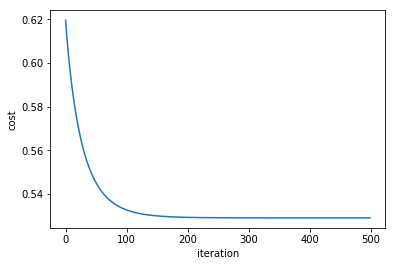

In [647]:
plt.plot(J_hist)
plt.xlabel('iteration')
plt.ylabel('cost')

In [648]:
J

0.5290030516411031

In [649]:
result = opt.minimize(ComputecostLogisticRegularized, theta, args=(X,y,lam))

In [650]:
result

      fun: 0.5290027368862521
 hess_inv: array([[ 5.81665504e+00,  2.47057271e+00, -1.43073318e+01,
        -6.37412329e-01, -1.66318639e+00,  5.27906236e+00,
         5.81326201e+00,  2.43254624e+00, -7.30164325e+00,
         1.72841719e+00, -2.01072931e+00, -8.62198943e-01,
        -1.33998162e+00, -6.84175793e+00, -3.32558103e-01,
        -1.42924081e+00, -1.47616628e+00, -8.52164909e-01,
         3.38255349e-01,  4.18240861e+00,  3.47661940e+00,
         2.39834204e+00, -1.34228746e+00,  1.18819704e+00,
         3.95263267e-02, -9.20328599e-01,  3.32511984e+00,
        -2.00154446e-01],
       [ 2.47057271e+00,  2.26721140e+00, -7.33856857e+00,
        -3.26951208e-01, -8.53079474e-01,  2.70775832e+00,
         2.98177126e+00,  1.24770700e+00, -3.74518535e+00,
         8.86557733e-01, -1.03134901e+00, -4.42236956e-01,
        -6.87307000e-01, -3.50929589e+00, -1.70569688e-01,
        -7.33082778e-01, -7.57159102e-01, -4.37091917e-01,
         1.73492568e-01,  2.14526488e+00,  1.783

In [651]:
func(result.x, X, y)
theta_sol = result.x
theta_sol

array([ 1.27285232,  1.18115595, -1.43167589, -0.1748278 , -1.19307389,
       -0.45638208, -0.92501435,  0.62537517, -0.91735722, -0.35763853,
       -0.27474177, -0.29555102, -0.14392312, -2.01997979, -0.36576854,
       -0.61588685, -0.27783198, -0.32751376,  0.12422958, -0.05129181,
       -0.04503545,  0.01539318, -1.45849326, -0.20618667, -0.29262613,
       -0.24206094,  0.02757952, -1.04348658])

In [652]:
x1plot = np.linspace(-1, 1.5, 50)
x2plot = np.linspace(-1, 1.5, 50)
z = np.zeros((len(x1plot), len(x2plot)))

In [653]:
def evaluateZ(theta, x1_val, x2_val):
    features = np.zeros(theta.shape)
    deg=6
    idx=0
    for i in range(0,deg+1):
        for j in range(0,deg-i+1):
            features[idx] = np.power(x1_val,i)*np.power(x2_val,j)
            idx = idx+1
    print(features)
    return features.T@theta


In [654]:
for i in range(len(x1plot)):
    for j in range(len(x2plot)):
        z[i,j] = evaluateZ(theta1,x1plot[i],x2plot[j])

[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.]
[ 1.         -0.94897959  0.90056227 -0.85461521  0.81101239 -0.76963421
  0.73036716 -1.          0.94897959 -0.90056227  0.85461521 -0.81101239
  0.76963421  1.         -0.94897959  0.90056227 -0.85461521  0.81101239
 -1.          0.94897959 -0.90056227  0.85461521  1.         -0.94897959
  0.90056227 -1.          0.94897959  1.        ]
[ 1.         -0.89795918  0.8063307  -0.72405205  0.65016919 -0.5838254
  0.52425138 -1.          0.89795918 -0.8063307   0.72405205 -0.65016919
  0.5838254   1.         -0.89795918  0.8063307  -0.72405205  0.65016919
 -1.          0.89795918 -0.8063307   0.72405205  1.         -0.89795918
  0.8063307  -1.          0.89795918  1.        ]
[ 1.         -0.84693878  0.71730529 -0.60751366  0.51452688 -0.43577276
  0.36907285 -1.          0.84693878 -0.71730529  0.60751366 -0.51452688
  0.43577276  1.         -0.84693878  0.71730529 -0.6075

  0.14366615 -0.04626462 -0.05995517  0.02502066]
[ 1.          1.34693878  1.81424406  2.44367568  3.29148153  4.4334241
  5.97155083 -0.54081633 -0.72844648 -0.98117281 -1.3215797  -1.78008695
 -2.39766813  0.2924823   0.39395575  0.53063428  0.71473188  0.96270008
 -0.1581792  -0.2130577  -0.28697568 -0.38653867  0.0855459   0.11522508
  0.15520113 -0.04626462 -0.06231561  0.02502066]
[ 1.          1.39795918  1.95428988  2.73201748  3.81924893  5.33915412
  7.46391953 -0.54081633 -0.75603915 -1.05691187 -1.47751966 -2.06551218
 -2.88750172  0.2924823   0.40887832  0.5715952   0.79906675  1.11706271
 -0.1581792  -0.22112807 -0.30912801 -0.43214835  0.0855459   0.11958967
  0.16718148 -0.04626462 -0.06467605  0.02502066]
[ 1.          1.44897959  2.09954186  3.0421933   4.40807601  6.38721218
  9.2549401  -0.54081633 -0.78363182 -1.13546651 -1.64526781 -2.38395948
 -3.45430863  0.2924823   0.42380088  0.61407883  0.88978769  1.28928421
 -0.1581792  -0.22919844 -0.33210386 -0.48121171

[ 1.00000000e+00  5.81632653e-01  3.38296543e-01  1.96764316e-01
  1.14444551e-01  6.65646879e-02  3.87161960e-02 -1.83673469e-01
 -1.06830487e-01 -6.21360998e-02 -3.61403846e-02 -2.10204277e-02
 -1.22261672e-02  3.37359434e-02  1.96219262e-02  1.14127530e-02
  6.63802982e-03  3.86089489e-03 -6.19639776e-03 -3.60402727e-03
 -2.09621994e-03 -1.21922997e-03  1.13811387e-03  6.61964192e-04
  3.85019989e-04 -2.09041324e-04 -1.21585260e-04  3.83953452e-05]
[ 1.00000000e+00  6.32653061e-01  4.00249896e-01  2.53219322e-01
  1.60199979e-01  1.01351007e-01  6.41200250e-02 -1.83673469e-01
 -1.16201583e-01 -7.35152870e-02 -4.65096714e-02 -2.94244860e-02
 -1.86154911e-02  3.37359434e-02  2.13431478e-02  1.35028078e-02
  8.54259270e-03  5.40449742e-03 -6.19639776e-03 -3.92017001e-03
 -2.48010756e-03 -1.56904764e-03  1.13811387e-03  7.20031227e-04
  4.55529960e-04 -2.09041324e-04 -1.32250633e-04  3.83953452e-05]
[ 1.00000000e+00  6.83673469e-01  4.67409413e-01  3.19555415e-01
  2.18471559e-01  1.493

[ 1.00000000e+00 -7.95918367e-01  6.33486047e-01 -5.04203181e-01
  4.01304572e-01 -3.19405680e-01  2.54220847e-01  1.22448980e-01
 -9.74593919e-02  7.75697201e-02 -6.17391650e-02  4.91393354e-02
 -3.91108996e-02  1.49937526e-02 -1.19338031e-02  9.49833307e-03
 -7.55989775e-03  6.01706148e-03  1.83596971e-03 -1.46128201e-03
  1.16306119e-03 -9.25701766e-04  2.24812617e-04 -1.78932491e-04
  1.42415656e-04  2.75280756e-05 -2.19101010e-05  3.37078476e-06]
[ 1.00000000e+00 -7.44897959e-01  5.54872970e-01 -4.13323743e-01
  3.07884012e-01 -2.29342172e-01  1.70836516e-01  1.22448980e-01
 -9.12119950e-02  6.79436289e-02 -5.06110705e-02  3.77000831e-02
 -2.80827150e-02  1.49937526e-02 -1.11688157e-02  8.31962803e-03
 -6.19727394e-03  4.61633671e-03  1.83596971e-03 -1.36761009e-03
  1.01872996e-03 -7.58849870e-04  2.24812617e-04 -1.67462460e-04
  1.24742444e-04  2.75280756e-05 -2.05056073e-05  3.37078476e-06]
[ 1.00000000e+00 -6.93877551e-01  4.81466056e-01 -3.34078488e-01
  2.31809563e-01 -1.608

  0.00487453  0.00767146 -0.00375745  0.00289637]
[ 1.         -0.43877551  0.19252395 -0.08447479  0.03706547 -0.01626342
  0.00713599  0.37755102 -0.16566014  0.07268761 -0.03189354  0.01399411
 -0.00614027  0.14254477 -0.06254516  0.02744328 -0.01204144  0.00528349
  0.05381792 -0.02361399  0.01036124 -0.00454626  0.02031901 -0.00891548
  0.0039119   0.00767146 -0.00336605  0.00289637]
[ 1.         -0.3877551   0.15035402 -0.05830054  0.02260633 -0.00876572
  0.00339895  0.37755102 -0.14639733  0.05676631 -0.02201143  0.00853504
 -0.00330951  0.14254477 -0.05527246  0.02143218 -0.00831044  0.00322241
  0.05381792 -0.02086817  0.00809174 -0.00313761  0.02031901 -0.0078788
  0.00305505  0.00767146 -0.00297465  0.00289637]
[ 1.         -0.33673469  0.11339025 -0.03818243  0.01285735 -0.00432952
  0.0014579   0.37755102 -0.12713453  0.04281061 -0.01441582  0.00485431
 -0.00163461  0.14254477 -0.04799977  0.01616319 -0.00544271  0.00183275
  0.05381792 -0.01812236  0.00610243 -0.0020549 

  0.34321981  0.29944926 -0.28417124  0.23528156]
[ 1.         -0.89795918  0.8063307  -0.72405205  0.65016919 -0.5838254
  0.52425138  0.78571429 -0.70553936  0.63354555 -0.56889804  0.51084722
 -0.45871995  0.61734694 -0.55435235  0.49778579 -0.44699132  0.40137996
  0.48505831 -0.43556256  0.3911174  -0.35120746  0.38111724 -0.34222773
  0.30730653  0.29944926 -0.26889322  0.23528156]
[ 1.         -0.84693878  0.71730529 -0.60751366  0.51452688 -0.43577276
  0.36907285  0.78571429 -0.6654519   0.56359701 -0.47733216  0.40427112
 -0.34239289  0.61734694 -0.52285506  0.44282622 -0.3750467   0.31764159
  0.48505831 -0.41081469  0.34793489 -0.29467955  0.38111724 -0.32278297
  0.27337741  0.29944926 -0.25361519  0.23528156]
[ 1.         -0.79591837  0.63348605 -0.50420318  0.40130457 -0.31940568
  0.25422085  0.78571429 -0.62536443  0.49773904 -0.39615964  0.31531074
 -0.25096161  0.61734694 -0.49135777  0.39108067 -0.31126829  0.24774415
  0.48505831 -0.38606682  0.30727767 -0.24456794

 0.36303163 0.72913636 0.49849119 0.68449536]
[1.         0.73469388 0.53977509 0.39656946 0.29135715 0.21405832
 0.15726733 0.93877551 0.68971262 0.50672764 0.37228969 0.27351896
 0.2009527  0.88129946 0.64748532 0.4757035  0.34949645 0.2567729
 0.82734235 0.60784336 0.44657879 0.32809871 0.77668874 0.57062846
 0.41923724 0.72913636 0.53569202 0.68449536]
[1.         0.78571429 0.61734694 0.48505831 0.38111724 0.29944926
 0.23528156 0.93877551 0.73760933 0.57955019 0.45536086 0.35778353
 0.28111563 0.88129946 0.69244957 0.54406752 0.42748163 0.33587842
 0.82734235 0.6500547  0.51075727 0.40130928 0.77668874 0.61025544
 0.47948641 0.72913636 0.57289286 0.68449536]
[1.         0.83673469 0.70012495 0.58581883 0.49017494 0.41014638
 0.34318371 0.93877551 0.78550604 0.65726016 0.54995237 0.46016423
 0.38503538 0.88129946 0.73741383 0.61701974 0.51628182 0.43199091
 0.82734235 0.69226605 0.57924302 0.48467273 0.77668874 0.64988241
 0.54377916 0.72913636 0.61009369 0.68449536]
[1.         0

 7.10518889e-04 1.94966383e+00 3.97890578e-02 2.22818723e+00]
[1.00000000e+00 7.14285714e-02 5.10204082e-03 3.64431487e-04
 2.60308205e-05 1.85934432e-06 1.32810309e-07 1.14285714e+00
 8.16326531e-02 5.83090379e-03 4.16493128e-04 2.97495091e-05
 2.12496494e-06 1.30612245e+00 9.32944606e-02 6.66389005e-03
 4.75992146e-04 3.39994390e-05 1.49271137e+00 1.06622241e-01
 7.61587434e-03 5.43991024e-04 1.70595585e+00 1.21853989e-01
 8.70385639e-03 1.94966383e+00 1.39261702e-01 2.22818723e+00]
[1.00000000e+00 1.22448980e-01 1.49937526e-02 1.83596971e-03
 2.24812617e-04 2.75280756e-05 3.37078476e-06 1.14285714e+00
 1.39941691e-01 1.71357173e-02 2.09825109e-03 2.56928705e-04
 3.14606578e-05 1.30612245e+00 1.59933361e-01 1.95836769e-02
 2.39800125e-03 2.93632806e-04 1.49271137e+00 1.82780984e-01
 2.23813450e-02 2.74057286e-03 1.70595585e+00 2.08892553e-01
 2.55786800e-02 1.94966383e+00 2.38734347e-01 2.22818723e+00]
[1.00000000e+00 1.73469388e-01 3.00916285e-02 5.21997637e-03
 9.05506105e-04 1.570

[ 1.         -1.          1.         -1.          1.         -1.
  1.          1.29591837 -1.29591837  1.29591837 -1.29591837  1.29591837
 -1.29591837  1.67940441 -1.67940441  1.67940441 -1.67940441  1.67940441
  2.17637103 -2.17637103  2.17637103 -2.17637103  2.82039919 -2.82039919
  2.82039919  3.65500711 -3.65500711  4.73659085]
[ 1.         -0.94897959  0.90056227 -0.85461521  0.81101239 -0.76963421
  0.73036716  1.29591837 -1.22980008  1.16705518 -1.10751155  1.05100586
 -0.99738311  1.67940441 -1.59372052  1.51240824 -1.43524456  1.3620178
  2.17637103 -2.06533169  1.95995762 -1.85995979  2.82039919 -2.67650127
  2.53994508  3.65500711 -3.46852716  4.73659085]
[ 1.         -0.89795918  0.8063307  -0.72405205  0.65016919 -0.5838254
  0.52425138  1.29591837 -1.1636818   1.04493876 -0.93831235  0.8425662
 -0.75659005  1.67940441 -1.50803662  1.35415533 -1.21597621  1.09189701
  2.17637103 -1.95429235  1.75487476 -1.57580591  2.82039919 -2.53260335
  2.27417444  3.65500711 -3.2820472

  1.48710603e-01  6.38721218e+00 -1.17316142e+00  9.25494010e+00]
[ 1.00000000e+00 -1.32653061e-01  1.75968347e-02 -2.33427398e-03
  3.09648590e-04 -4.10758333e-05  5.44883503e-06  1.44897959e+00
 -1.92211579e-01  2.54974543e-02 -3.38231537e-03  4.48674487e-04
 -5.95180442e-05  2.09954186e+00 -2.78510655e-01  3.69452909e-02
 -4.90090594e-03  6.50120175e-04  3.04219330e+00 -4.03556255e-01
  5.35329725e-02 -7.10131268e-03  4.40807601e+00 -5.84744777e-01
  7.75681847e-02  6.38721218e+00 -8.47283248e-01  9.25494010e+00]
[ 1.00000000e+00 -8.16326531e-02  6.66389005e-03 -5.43991024e-04
  4.44074305e-05 -3.62509637e-06  2.95926234e-07  1.44897959e+00
 -1.18284048e-01  9.65584068e-03 -7.88231892e-04  6.43454606e-05
 -5.25269066e-06  2.09954186e+00 -1.71391172e-01  1.39911161e-02
 -1.14213193e-03  9.32352592e-05  3.04219330e+00 -2.48342311e-01
  2.02728417e-02 -1.65492585e-03  4.40807601e+00 -3.59842940e-01
  2.93749339e-02  6.38721218e+00 -5.21405076e-01  9.25494010e+00]
[ 1.00000000e+00 -3.06

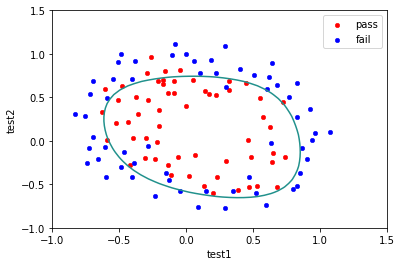

In [655]:
ax = score_admitted.plot(x='test1', y='test2', kind='scatter', marker='o', c='red', lw=0.5, label='pass')
ax.set_xlabel("Test 1")
ax.set_ylabel("Test 2")
score_dropped.plot(x='test1', y='test2', kind='scatter', marker='o', c='blue', lw=0.5, label='fail', ax=ax)
plt.contour(x1plot,x2plot,z,0)

In [656]:
def predict(theta_sol, X):
    h = Sigmoid(theta_sol.T@X)
    if X.ndim > 1:
        return [1 if hh >= 0.5 else 0 for hh in h]
    else:
        return h

In [657]:
y_predict = np.array(predict(theta_sol, X))